**Project Title:**<br>
Prediction of hotel reservation cancellation of a customer with reservation details using Machine Learning.

**Dataset Link:**
https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

**About this file**
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.
<br><br>
## Data Columns Description
<br>

### Independant Variables

**Booking_ID**: unique identifier of each booking<br>
**no_of_adults**: Number of adults<br>
**no_of_children**: Number of Children<br>
**no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel<br>
**no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel<br>
**type_of_meal_plan:** Type of meal plan booked by the customer:<br>
**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)<br>
**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.<br>
**lead_time:** Number of days between the date of booking and the arrival date<br>
**arrival_year:** Year of arrival date<br>
**arrival_month:** Month of arrival date<br>
**arrival_date:** Date of the month<br>
**market_segment_type:** Market segment designation.<br>
**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)<br>
**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking<br>
**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking<br>
**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)<br>
**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)<br>


### Dependant Variables

**booking_status:** Flag indicating if the booking was canceled or not.<br>

### Aim of the project:
This project aims to identify the reasons behind the cancellations of hotel reservations and develop machine-learning algorithms on oversampled and undersampled data to predict the customer who might cancel the reservation based on the customer details provided using the machine learning with best performance.
<br>
### Research question

1) What are the columns not important for analysis and why they dropped from the dataset ?<br>
2) What is one hot encoding and why it is crucial for analysing this dataset ?<br>
3) What are the classification algorithms considered and which algorithm has given the best performance on comparing Under-Sampled and Over-Sampled Data?<br>
4) Is the average price change and lead time responsible for the customer cancelling hotel reservation ?<br>

### Hypothesis

**Hypothesis:** will over-sampled data help achieve better performance than under-sampled data on classification algorithms?<br>

**Null Hypothesis:** There is no significant difference in the performance of classification algorithms trained on over-sampled data and under-sampled data.<br>

**Alternative Hypothesis:** Classification algorithms trained on over-sampled data will have better performance than classification algorithms trained on under-sampled data.


In [1]:
import pandas as pd #Pandas library, which deals with dataframework and analysis

import numpy as np #NumPy Library, this is used to deal with numbers and calculations.

import matplotlib.pyplot as plt # this is visualization library used for plotting graphs of the data.

import seaborn as sns # this is also a visualization library for plotting the graphs

from sklearn.preprocessing import OneHotEncoder #OneHotEncode is a function and a technique to convert the object..
#..data type categories to numerical categorical columns for machine understanding.

from sklearn.model_selection import train_test_split # importing train_test_split function from model selection module in the sklearn library.

from imblearn.over_sampling import SMOTE #SMOTE is oversampling technique in imblearn library to deal with imbalanced data.

from sklearn.preprocessing import StandardScaler # importing StandardScaler function from preprocessing module in the sklearn library.

from sklearn.model_selection import GridSearchCV #GridSearchCV function is used for cross validation of the multiple parameters...
#...for finding the best parameters for a machine learning algorithms.

# Machine Learning Algorithms Used for Experimentation in This Project.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # DecisionTreeClassifier is a Machine Learning algorithm function.
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier is a Machine Learning algorithm function in...
#...ensemble module of sklearn library.


from sklearn.metrics import accuracy_score, confusion_matrix #metrics is module in the sklearn library which consists of
# performance metrics like accuracy score, confusion matrix etc.,

import warnings
warnings.filterwarnings('ignore')

In [2]:
d = pd.read_csv("Hotel Reservations.csv") #Loading the CSV Dataset using read_csv function in the pandas library
d.head() # head() displays top 5 rows in dataframe.

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
d.info() # gives information about the columns in the data and their data types and also shows if there any any null values in
# the column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Data Preprocessing

In [4]:
# Check the misssing data from the dataset in all the columns,
# if there are any null values, isnull() will show that as TRUE.
# If there are no null values, it will show false.
d.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

Since there are no null values in the dataset for 36275 rows across all the 19 columns, data is full.<br>

### Remove UnWanted Columns

Lets Understand the data column wise, to remove unwanted data.<br>


In [5]:
d["type_of_meal_plan"].unique() #unique() function gives all the unique values in column without any duplicates.

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [6]:
d["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [7]:
d["arrival_year"].unique()

array([2017, 2018], dtype=int64)

In [8]:
d["market_segment_type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

column **Booking_ID** is not needed for analysis as it conists of unique id data, which is not useful for observing the patterns. Hence it can be removed from the data.<br><br>

column **type_of_meal_plan** is also not needed as its not relatable for reservation cancellation.<br>

<br>And also **room_type_reserved** has no description for its room types, but seems like its relatable to the customer reservation cancellation. It can be assumed like customer has cancelled its current room type from this hotel as he might have got the same room type with cheaper price, this can be the possible scenario. so we can analyze this by converting 7 room types using one_hot encoding as there is no information provided for its types.<br><br>

column **market_segment_type** is easily understandable from its values as it says "How the customer booked the room in Hotel",
wether its through offline booking at hotel, booked through online or corporate has booked room for them for meetings or any other reason, Aviation offers for pilots, or any other complimentary.

In [9]:
# Removing the unwanted columns from the dataset using drop function.
d = d.drop(columns = ["Booking_ID","type_of_meal_plan"],axis=1) 
#Booking_ID is removed using drop function specifying axis = 1 which means from columns.
d

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Previously it was 19 columns in the original dataset, after dropping the unwanted columns ("Booking_ID", "type_of_meal_plan") now its 17 columns.

For the Machine to understand the data, every thing should be in numeric values. object values can't be understood by the machine. In order to make object type categorical data in a machine understandable format, we need to perfrom "One-Hot Encoding".

#### One-Hot Encoding

One-Hot encoding is a technique used to represent categorical data as numerical values in a machine learning model. This is done by creating a new binary feature for each possible category and assigning a value of 1 to the feature of each sample that corresponds to its original category. For example, if a categorical feature has three possible categories, then one-hot encoding would create three new binary features, one for each category. The feature for the category that the sample belongs to would be assigned a value of 1, and the features for the other two categories would be assigned a value of 0.<br>

One-Hot encoding is a common way to represent categorical data in machine learning models because it allows the model to learn the relationships between different categories. For example, if a model is trying to predict whether a customer will buy a product, it is important for the model to know that the customer's gender is not the same as their age. One-hot encoding allows the model to learn this distinction by creating separate features for the customer's gender and age.

In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'd' is your DataFrame with columns 'room_type_reserved' and 'market_segment_type'
one_hot_encoder = OneHotEncoder(sparse=False, drop=None)  # Create the encoder with drop='first' to reduce multicollinearity

# Fit and transform the encoder on the specified columns
one_hot_encoded_features = one_hot_encoder.fit_transform(d[['room_type_reserved', 'market_segment_type']])

# Create a DataFrame with the one-hot encoded features
encoded_column_names = one_hot_encoder.get_feature_names_out(['room_type_reserved', 'market_segment_type'])
data_encoded = pd.DataFrame(one_hot_encoded_features, columns=encoded_column_names)

# Add the encoded DataFrame back to your original DataFrame 'd'
data_encoded = pd.concat([d, data_encoded], axis=1)

# Drop the original categorical columns if needed
data_encoded.drop(['room_type_reserved', 'market_segment_type'], axis=1, inplace=True)

# Display information about the encoded DataFrame
data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

Now it shows 27 columns previously it was 17 columns.
wait....wait...what.....previously it was 17, but 12 columns has been created so 17+12 should be 29 columns, how can it be 27

Observe carefully, you are encoding for two columns, one hot encoding will be applied only to the categories of the columns, hence no. of categories in each column will be converted to those many no. of columns. 

hence for "room_type_reserved" column with 7 Categories has been converted like "Column Name + Category Name".
For Example: 

1) "room_type_reserved" + "Room_Type_1" = room_type_reserved_Room_Type_1
2) "room_type_reserved" + "Room_Type_2" = room_type_reserved_Room_Type_2 and so on..
3) "market_segment_type" + "Aviation" = market_segment_type_Aviation
4) "market_segment_type" + "Complementary" = market_segment_type_Complementary

In [11]:
data_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,2,3,0,5,2018,11,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2,0,0,2,0,211,2018,5,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,0,1,1,0,48,2018,4,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Since there are 27 columns now, our dependant variable Booking_Status was stuck in the middle away from the sight. So we need to pickit up from the middle and make it available in the last column. Hence, we use the **pop()** function to cut it from the middle and paste it in the last.

In [12]:
#poping target column inbetween the columns and  adding it to the last
booking_status_col = data_encoded.pop("booking_status")
data_encoded["booking_status"] = booking_status_col #this line will create the column in the last with the name "booking_status"
# and it will add the content of the poped out data which is stored in booking_data_col will be added to the created column. 
data_encoded

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,1,2,0,224,2017,10,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Not_Canceled
1,2,0,2,3,0,5,2018,11,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not_Canceled
2,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Canceled
3,2,0,0,2,0,211,2018,5,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Canceled
4,2,0,1,1,0,48,2018,4,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not_Canceled
36271,2,0,1,3,0,228,2018,10,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Canceled
36272,2,0,2,6,0,148,2018,7,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not_Canceled
36273,2,0,0,3,0,63,2018,4,21,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Canceled


In [13]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

see, previously it was 15th column. After poping and adding to the last now its the 27th column.

In [14]:
data_encoded["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

# Data Visualization

Firstly, we are plotting the object columns with categories with the bar plots to know the value counts of each category.

Object Columns:  ['room_type_reserved', 'market_segment_type', 'booking_status']


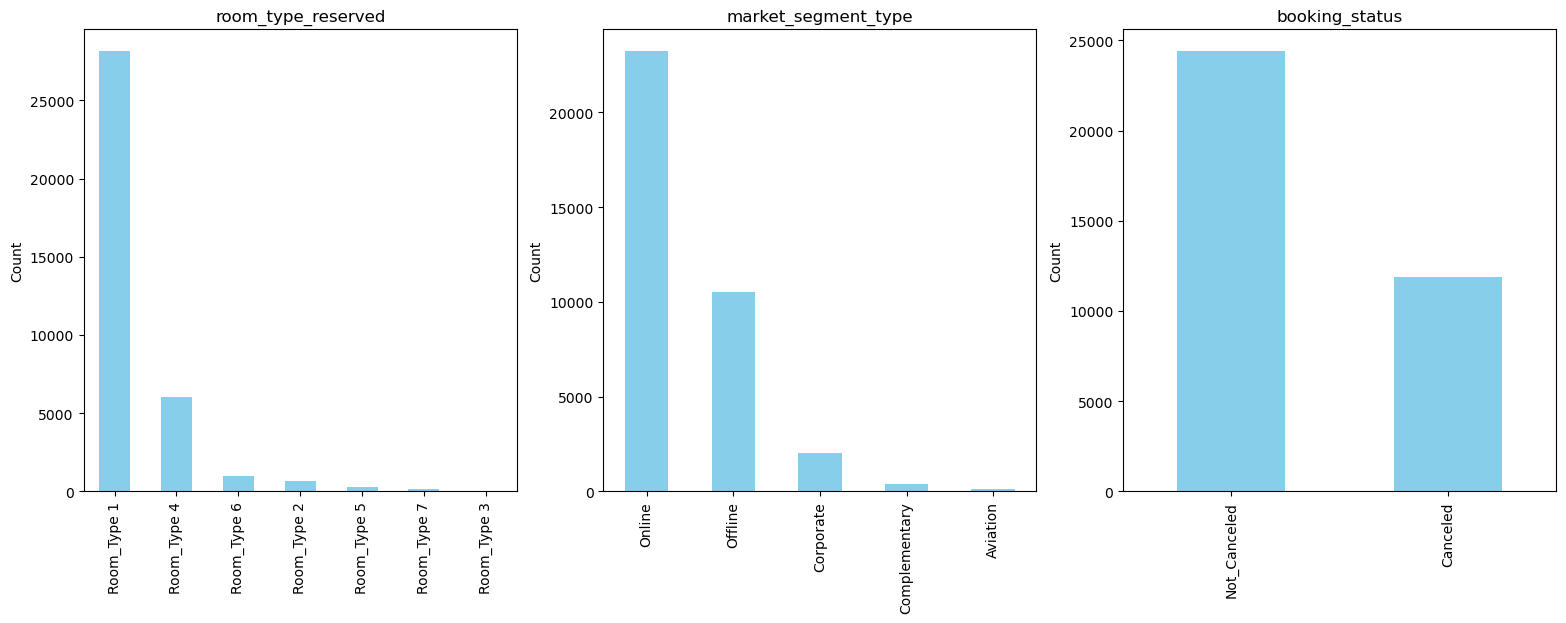

In [15]:

# Create a list of object columns
object_cols = [col for col in d.columns if d[col].dtype == "object"] 
# This is done by looping through the columns in the d DataFrame and checking the data type of each column.
# If the data type of a column is object, then it is added to the list of object columns.


# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19, 6)) 
# The second line of code creates a figure with three subplots.
# This is done using the plt.subplots() function. 
# The 1, 3 in the plt.subplots() function specifies that we want to create a figure with 1 row and 3 columns. 
# The figsize=(19, 6) parameter specifies the size of the figure in inches.

# Plot the object columns in the subplots
for col, ax in zip(object_cols, (ax1, ax2, ax3)):
    d[col].value_counts().plot(kind="bar", ax=ax, color="SkyBlue")
    ax.set_title(col)
    ax.set_ylabel("Count")
# This line of code plots the object columns in the subplots. 
# This is done using a for loop. 
# The for loop iterates through the list of object columns and plots the value counts for each column in a separate subplot.
# The d[col].value_counts() function returns the number of times each value appears in the col column.
# The plot(kind="bar", ax=ax, color="SkyBlue") function plots the value counts as a bar chart.
# The ax.set_title(col) and ax.set_ylabel("Count") functions set the title and y-axis label for the subplot.
    

print("Object Columns: ",object_cols)
plt.show() # line of code shows the plot. This is done using the plt.show() function.

#### Observations:

1) Room_Type 1 is the most chosen by the customers. Need to explore with booking status i.e., (room_type_reserved vs booking_status)

In [16]:
sorted(list(d["room_type_reserved"].unique()))


['Room_Type 1',
 'Room_Type 2',
 'Room_Type 3',
 'Room_Type 4',
 'Room_Type 5',
 'Room_Type 6',
 'Room_Type 7']

In [17]:

# Create a dictionary to store the counts of booking_status for each room_type_reserved
counts = {}
for room_type, booking_status in zip(d["room_type_reserved"], d["booking_status"]):
    if room_type not in counts:
        counts[room_type] = {}
    if booking_status not in counts[room_type]:
        counts[room_type][booking_status] = 0
    counts[room_type][booking_status] += 1

print(counts)    
# Create a NumPy array to store the counts of booking_status for each room_type_reserved
bar_data = np.array([[counts[room_type]["Canceled"], counts[room_type]["Not_Canceled"]] for room_type in counts])
bar_keys = list(counts.keys())

print(bar_data)
print(bar_keys)

{'Room_Type 1': {'Not_Canceled': 19058, 'Canceled': 9072}, 'Room_Type 4': {'Not_Canceled': 3988, 'Canceled': 2069}, 'Room_Type 2': {'Not_Canceled': 464, 'Canceled': 228}, 'Room_Type 6': {'Not_Canceled': 560, 'Canceled': 406}, 'Room_Type 5': {'Not_Canceled': 193, 'Canceled': 72}, 'Room_Type 7': {'Not_Canceled': 122, 'Canceled': 36}, 'Room_Type 3': {'Not_Canceled': 5, 'Canceled': 2}}
[[ 9072 19058]
 [ 2069  3988]
 [  228   464]
 [  406   560]
 [   72   193]
 [   36   122]
 [    2     5]]
['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3']


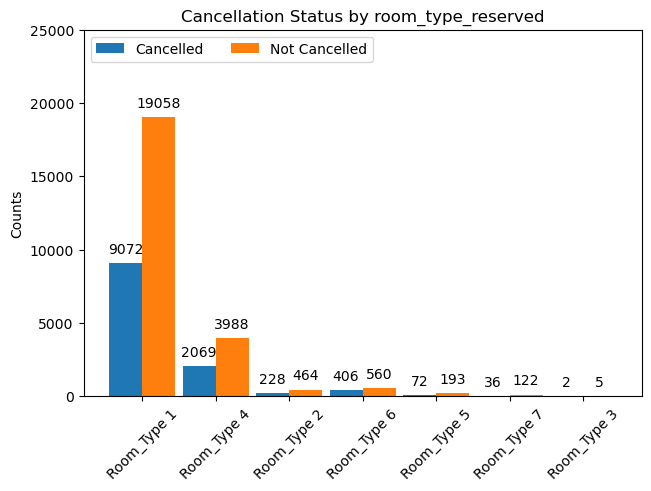

In [18]:

room_type_reserved_col = (tuple(bar_keys))
counts = {
    'Cancelled': tuple([bar_data[i][0] for i in range(bar_data.shape[0])]),
    'Not Cancelled': tuple([bar_data[i][1] for i in range(bar_data.shape[0])]),

}

x = np.arange(len(room_type_reserved_col))  # the label locations
width = 0.45  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
    # Display the values horizontally on x-axis and on the data bars with their values as well
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(room_type_reserved_col, rotation=45)
    ax.set_ylabel('Counts')
    ax.set_title('Cancellation Status by room_type_reserved')
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 25000)

plt.show()

In [19]:
d["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

### Cancellation Status by Market Segment Type

<img src="images/market_segment.png" width="800" height="800" style="float:left"/>

In [20]:
non_float_cols = [col for col in d.columns if (d[col].dtype != "object") and (col not in ("lead_time", "avg_price_per_room","no_of_previous_bookings_not_canceled","arrival_date"))]
float_cols = [col for col in d[["lead_time", "avg_price_per_room","no_of_previous_bookings_not_canceled","arrival_date"]]]

In [21]:
print(non_float_cols)
print(float_cols)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests']
['lead_time', 'avg_price_per_room', 'no_of_previous_bookings_not_canceled', 'arrival_date']


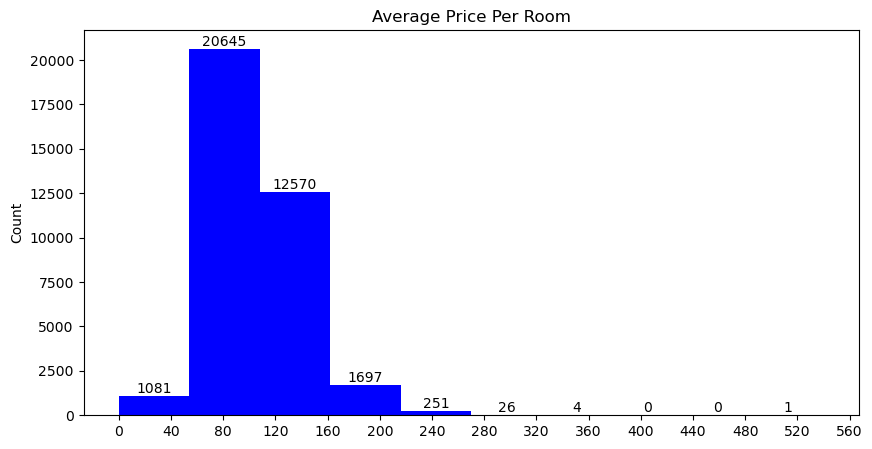

In [19]:

# Create a figure with 2 rows and 1 column
fig, axes = plt.subplots(1, 1, figsize=(10, 5))

d["avg_price_per_room"].plot(kind="hist", ax=axes, color="blue")
axes.set_title("Average Price Per Room")
axes.set_ylabel("Count")

    # Set the x-axis limits to avoid clumbiness
axes.set_xticks(np.arange(0, axes.get_xlim()[1], 40))
axes.bar_label(axes.containers[0])

plt.show()

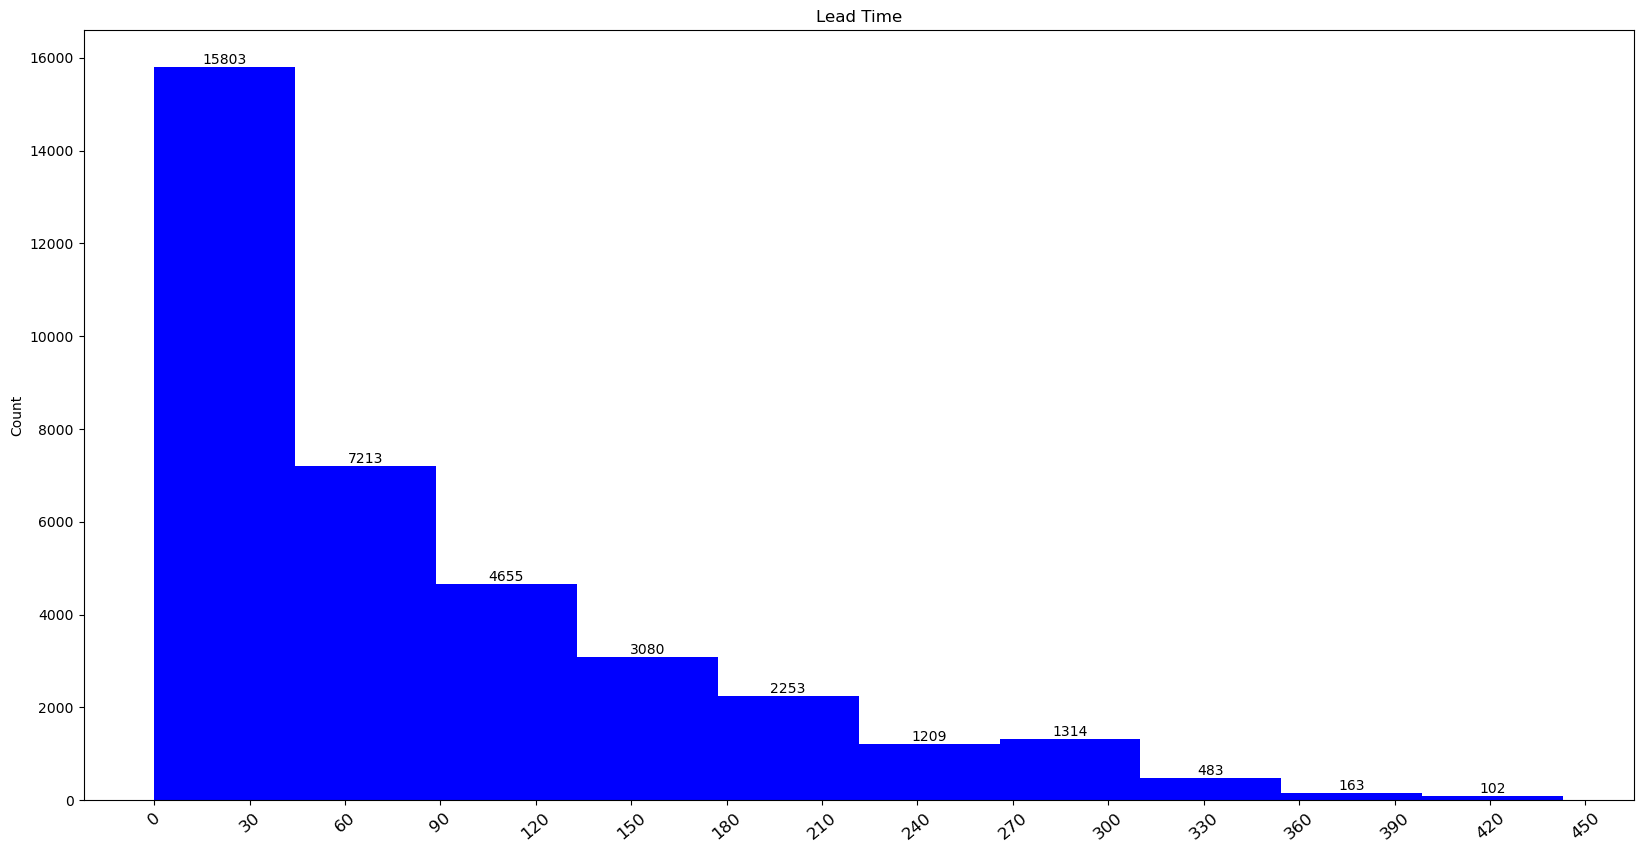

In [26]:

# Create a figure with 2 rows and 1 column
fig, axes = plt.subplots(1, 1, figsize=(20, 10))

d["lead_time"].plot(kind="hist", ax=axes, color="blue")
axes.set_title("Lead Time")
axes.set_ylabel("Count")


axes.set_xticks(np.arange(0, axes.get_xlim()[1], 30))
plt.xticks(rotation=40,size=12)
axes.bar_label(axes.containers[0])

plt.show()

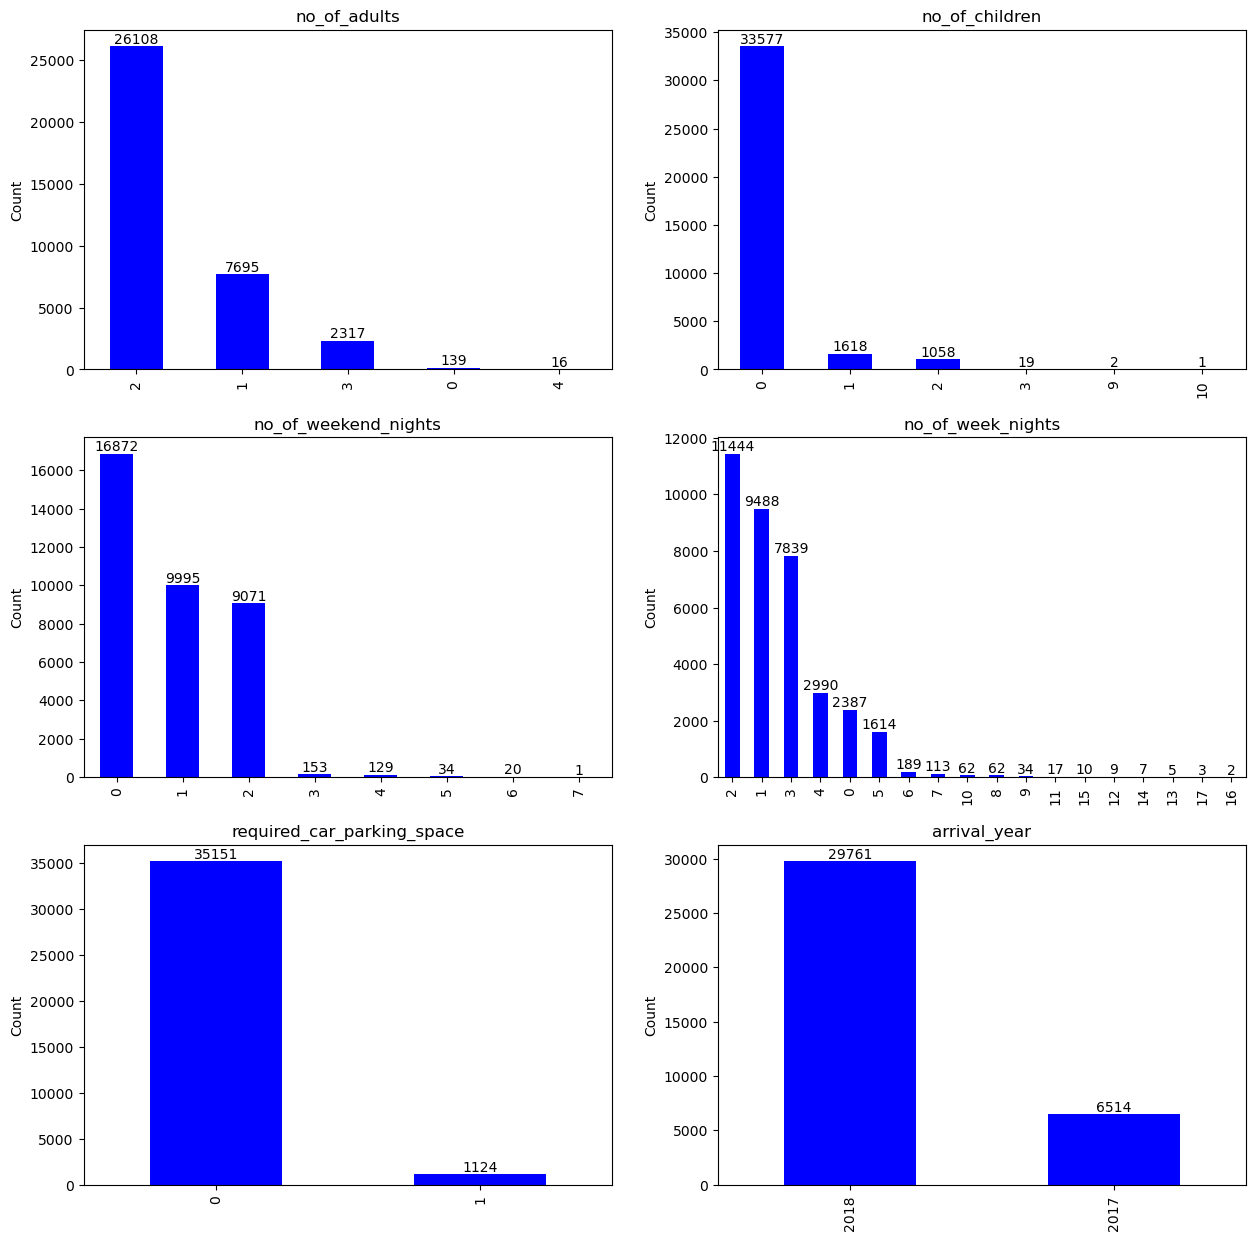

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Create a list of numeric columns


# Create a figure with 3 rows and 4 columns
fig, axes = plt.subplots(3,2 , figsize=(15, 15))

# Plot the numeric columns in the subplots
for col, ax in zip(non_float_cols[0:6], axes.flatten()):
    d[col].value_counts().plot(kind="bar", ax=ax, color="blue")
    ax.set_title(col)
    ax.set_ylabel("Count")
    ax.bar_label(ax.containers[0])

plt.show()

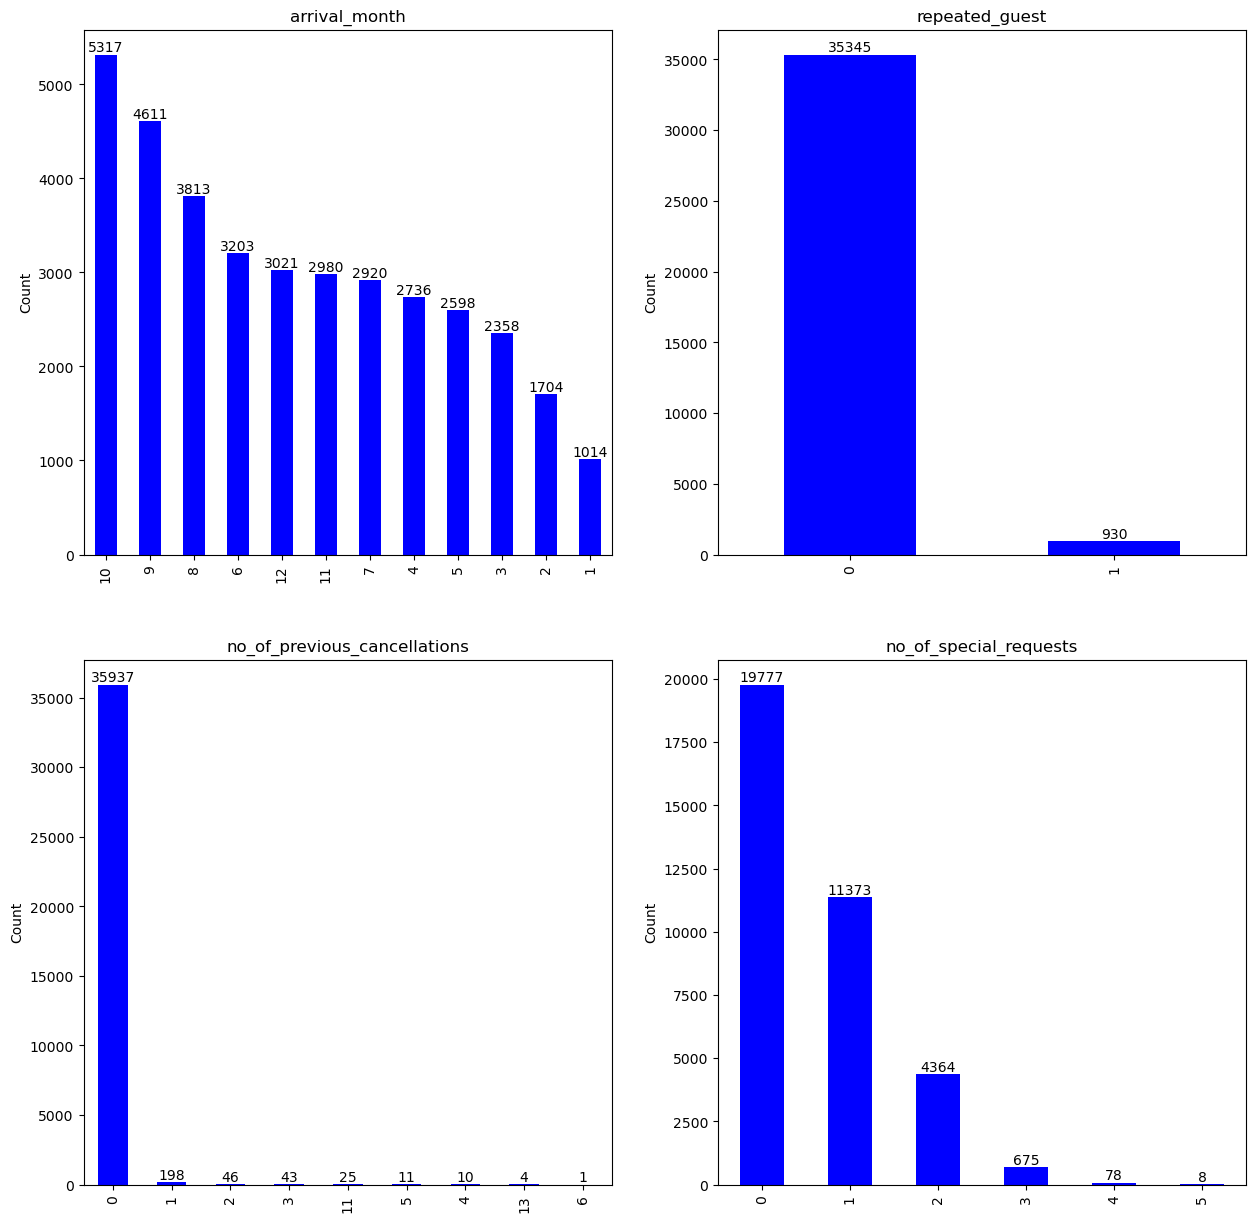

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Create a list of numeric columns


# Create a figure with 3 rows and 4 columns
fig, axes = plt.subplots(2,2 , figsize=(15, 15))

# Plot the numeric columns in the subplots
for col, ax in zip(non_float_cols[6:10], axes.flatten()):
    d[col].value_counts().plot(kind="bar", ax=ax, color="blue")
    ax.set_title(col)
    ax.set_ylabel("Count")
    ax.bar_label(ax.containers[0])

plt.show()

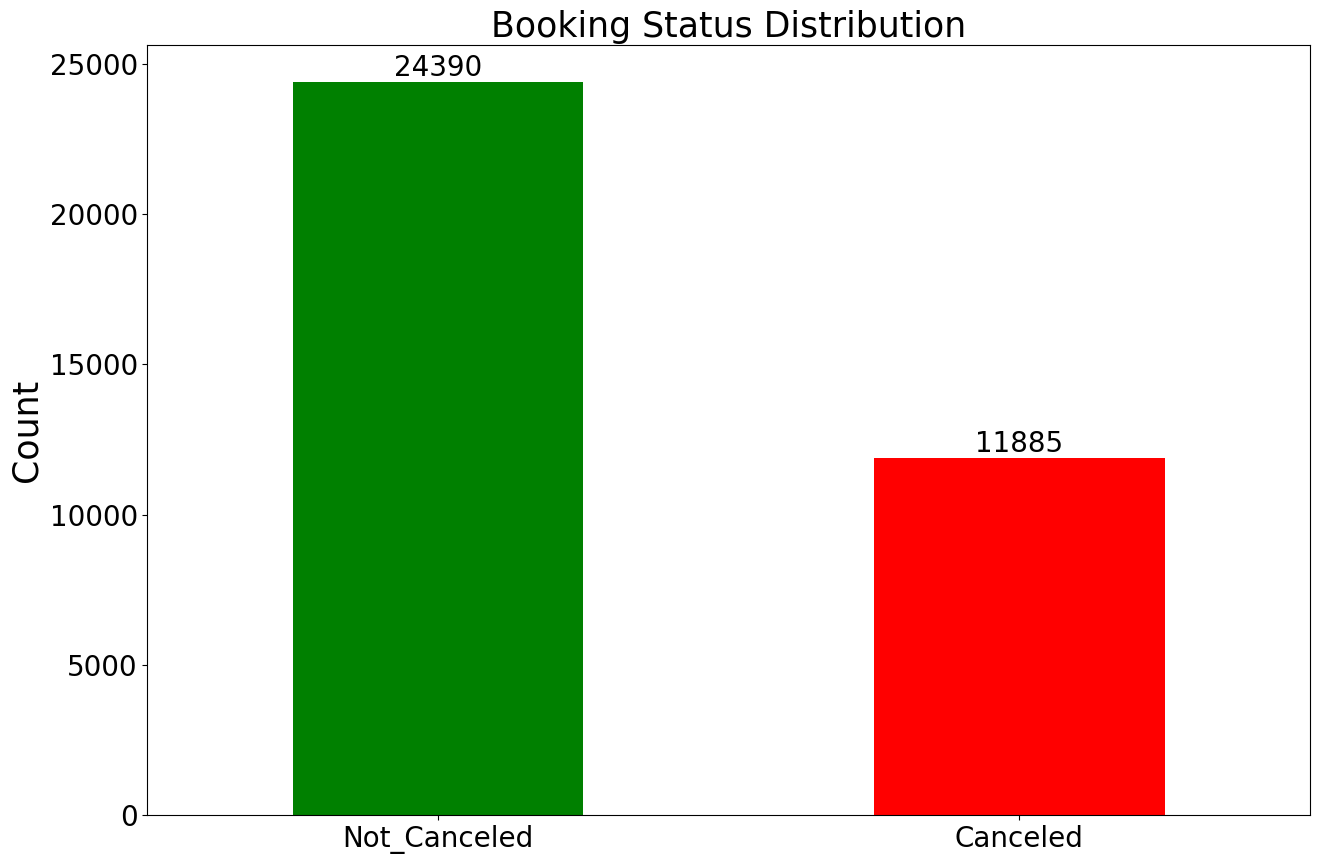

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the numeric columns in the subplot
d['booking_status'].value_counts().plot(kind="bar", ax=ax, color=["green","red"])
ax.set_title("Booking Status Distribution", size = 25)
plt.xticks(rotation=0,size=20)
ax.set_ylabel("Count", size=25)
plt.yticks(size=20)
ax.bar_label(ax.containers[0], size=20)

plt.show()

When dealing with imbalanced datasets, where one class has significantly more samples than the other, it can lead to biased model performance. <br>

From the above it is observed that, data is higly imbalanced majority class is 24390 and Minority Class is 11885.For this imbalance, we need to apply data resampling techniques.<br>

So we are considering the "UNDERSAMPLING" technique as it randomly remove samples from the majority class to match the number of samples in the minority class. This will be tested after experimenting on OVERSAMPLING. This can potentially discard valuable information, so it should be used with caution.<br>

So we are considering "OVERSAMPLING with SMOTHE" technique as OVERSAMPLING randomly replicate samples from the minority class to increase its representation. This can lead to overfitting, so techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used to generate synthetic samples based on the existing minority class samples. This technique is also a risk for random data being generated. <br> 

Lets See, which technique will be best for the performance, i.e., OVERSAMPLING OE UNDERSAMPLING

Before that lets split the data into training and testing sets.

In [52]:
train_data, test_data, train_target, test_target = train_test_split(
    data_encoded.iloc[:, :-1], data_encoded.iloc[:, -1], test_size=0.15, random_state=42
)
val_data, test_data, val_target, test_target = train_test_split(
    test_data, test_target, test_size=0.20, random_state=42
)

#unseen_data = data_encoded.iloc[:, :-1].sample(frac=0.07, random_state=42)

The train_test_split() function is a function from the sklearn.model_selection library. It is used to split a dataset into two parts: a training set and a test set. The training set is used to train a model, and the test set is used to test the model's accuracy.

The data_encoded.iloc[:, :-1] part of the code specifies the features of the dataset. The features are the columns of the dataset that are not the target variable. In this case, the target variable is the last column of the dataset.

The data_encoded.iloc[:, -1] part of the code specifies the target variable.

The test_size=0.15 part of the code specifies the size of the test set. In this case, the test set will be 15% of the total dataset.

The random_state=42 part of the code specifies the random seed. This is used to ensure that the same split is produced every time the code is run.

In summary, the line of code train_test_split(data_encoded.iloc[:, :-1], data_encoded.iloc[:, -1], test_size=0.1, random_state=42) splits the dataset into a training set and a test set. The training set will be 85% of the total dataset, and the test set will be 15% of the total dataset. The same split will be produced every time the code is run.

In [53]:
# These will be used for Undersampling later.

train_data_us = train_data
test_data_us = test_data
val_data_us = val_data
val_target_us = val_target
train_target_us = train_target
test_target_us = test_target

#unseen_data_us = unseen_data

In [54]:
print("train_data.shape: ",train_data.shape)
print("train_target.shape: ",train_target.shape)
print("val_data,shape: ", val_data.shape)
print("val_target,shape: ", val_target.shape)
print("test_data.shape: ",test_data.shape)
print("test_target.shape: ",test_target.shape)
#print("unseen_data.shape: ",unseen_data.shape)

train_data.shape:  (30833, 26)
train_target.shape:  (30833,)
val_data,shape:  (4353, 26)
val_target,shape:  (4353,)
test_data.shape:  (1089, 26)
test_target.shape:  (1089,)


In [55]:
train_target.head()

26071    Not_Canceled
10448    Not_Canceled
20109    Not_Canceled
16177    Not_Canceled
17708    Not_Canceled
Name: booking_status, dtype: object

In [56]:
train_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
26071,2,0,2,2,0,38,2018,9,10,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10448,2,0,0,4,0,62,2018,4,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20109,2,0,2,2,0,134,2017,12,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16177,2,0,2,5,0,6,2017,9,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17708,2,1,2,0,0,9,2018,1,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**How Does SMOTHE(Synthetic Minority Over-sampling Technique) Work ?**<br>

SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique for addressing class imbalance by generating synthetic samples for the minority class. It creates new synthetic samples by interpolating between existing minority class samples.<br>

**Here's how SMOTE works:**<br>

1) Select a minority class sample: SMOTE randomly selects a minority class sample from the dataset.<br>

2) Find nearest neighbors: SMOTE calculates the k nearest neighbors of the selected sample. The value of k is specified by the user.<br>

3) Generate synthetic samples: For each selected sample, SMOTE creates synthetic samples by interpolating between the feature values of the selected sample and its k nearest neighbors. It randomly selects one or more neighbors and creates synthetic samples by combining the features of the selected sample and its neighbors.<br>

4) Repeat steps 1-3: SMOTE repeats steps 1-3 until the desired level of imbalance is achieved or the dataset is balanced.<br>

The synthetic samples generated by SMOTE help to increase the representation of the minority class in the dataset. By creating new samples rather than replicating existing ones, SMOTE introduces diversity and reduces the risk of overfitting. It helps to address the class imbalance problem and improve the model's ability to learn and generalize from the minority class.<br>

**Note:** SMOTE should only be applied to the training data and not the entire dataset, to avoid information leakage and artificially inflating the performance on the test set.
<br>

The imbalanced-learn library in Python provides an implementation of SMOTE, allowing you to easily apply this technique to your imbalanced datasets.

In [57]:
# Apply SMOTE for oversampling the minority class

smote = SMOTE(random_state=42)
train_data_osampled, train_target_osampled = smote.fit_resample(train_data, train_target)

In [58]:
train_data_osampled.shape, train_target_osampled.shape

((41584, 26), (41584,))

In [59]:
train_data_osampled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,2,2,0,38,2018,9,10,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,0,4,0,62,2018,4,5,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,2,2,0,134,2017,12,4,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,0,2,5,0,6,2017,9,20,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,1,2,0,0,9,2018,1,17,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41579,2,0,2,0,0,386,2018,10,23,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41580,2,0,1,2,0,32,2018,7,12,0,...,0.0,0.492997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41581,2,0,0,3,0,45,2018,4,26,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41582,3,0,0,3,0,147,2018,9,18,0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [60]:
train_target_osampled.head()

0    Not_Canceled
1    Not_Canceled
2    Not_Canceled
3    Not_Canceled
4    Not_Canceled
Name: booking_status, dtype: object

In [61]:
# Standardization of the values
scaler = StandardScaler()
train_data_osampled = scaler.fit_transform(train_data_osampled)
test_data_osampled = scaler.transform(test_data)
val_data_osampled = scaler.transform(val_data)

The first line of code, scaler = StandardScaler(), creates a new object of the StandardScaler class. 

The StandardScaler class is a class from the sklearn.preprocessing library. It is used to standardize the values in a dataset. 

Standardization is a process of transforming the values in a dataset so that they have a mean of 0 and a standard deviation of 1. This makes the values in the dataset more comparable to each other.

**train_data_osampled = scaler.fit_transform(train_data_osampled), val_data_osampled = scaler.transform(val_data), and test_data = scaler.transform(test_data)**, use the StandardScaler object to standardize the values in the **train_data_osampled, test_data, and unseen_data datasets.**

The **fit_transform()** method is used to fit the StandardScaler object to the **train_data_osampled** dataset. This means that the StandardScaler object will learn the mean and standard deviation of the values in the **train_data_osampled** dataset.

The **transform()** method is then used to standardize the values in the test_data and unseen_data datasets. This is done by subtracting the mean of the train_data_osampled dataset from the values in the test_data and unseen_data datasets, and then dividing the values by the standard deviation of the train_data_osampled dataset.

In summary, Standardization of the values standardizes the values in the train_data_osampled, test_data, and unseen_data datasets. This makes the values in the datasets more comparable to each other, which can improve the performance of machine learning models.

In [62]:
train_data_osampled

array([[ 0.32395106, -0.25203541,  1.44803106, ..., -0.22348259,
         1.58755994, -1.38903958],
       [ 0.32395106, -0.25203541, -0.9082102 , ..., -0.22348259,
        -0.63928696,  0.73214638],
       [ 0.32395106, -0.25203541,  1.44803106, ..., -0.22348259,
         1.58755994, -1.38903958],
       ...,
       [ 0.32395106, -0.25203541, -0.9082102 , ..., -0.22348259,
        -0.63928696,  0.73214638],
       [ 2.30093678, -0.25203541, -0.9082102 , ..., -0.22348259,
        -0.63928696,  0.73214638],
       [ 0.32395106, -0.25203541,  0.26991043, ..., -0.22348259,
        -0.63928696,  0.73214638]])

In [63]:
test_data_osampled

array([[-1.65303467, -0.25203541,  0.26991043, ..., -0.22348259,
        -0.63928696, -1.38903958],
       [-1.65303467, -0.25203541,  0.26991043, ..., -0.22348259,
         1.58755994, -1.38903958],
       [-1.65303467, -0.25203541, -0.9082102 , ..., -0.22348259,
        -0.63928696,  0.73214638],
       ...,
       [ 0.32395106, -0.25203541,  1.44803106, ..., -0.22348259,
        -0.63928696,  0.73214638],
       [ 0.32395106, -0.25203541,  0.26991043, ..., -0.22348259,
        -0.63928696,  0.73214638],
       [ 0.32395106, -0.25203541, -0.9082102 , ..., -0.22348259,
        -0.63928696,  0.73214638]])

In [64]:
val_data_osampled

array([[-1.65303467, -0.25203541,  0.26991043, ...,  4.55293698,
        -0.63928696, -1.38903958],
       [ 0.32395106, -0.25203541,  1.44803106, ..., -0.22348259,
        -0.63928696,  0.73214638],
       [ 0.32395106, -0.25203541,  1.44803106, ..., -0.22348259,
        -0.63928696,  0.73214638],
       ...,
       [ 0.32395106, -0.25203541,  0.26991043, ..., -0.22348259,
         1.58755994, -1.38903958],
       [ 0.32395106, -0.25203541,  0.26991043, ..., -0.22348259,
        -0.63928696,  0.73214638],
       [-1.65303467, -0.25203541,  1.44803106, ..., -0.22348259,
         1.58755994, -1.38903958]])

## Machine Learning Algorithms

### Logistic Regression

Logistic regression is a statistical model that is used for binary classification. It is a type of regression model, but instead of predicting a continuous value, it predicts a probability.

Logistic regression works by fitting a logistic function to the data. The logistic function is a sigmoid function that takes a real number as input and outputs a probability between 0 and 1.

Logistic regression is a simple but effective classifier. It is often used as a baseline classifier for other machine learning algorithms.

In [65]:
from sklearn.metrics import classification_report
# Logistic Regression
logistic_regression = LogisticRegression()

# Train the Logistic Regression classifier
logistic_regression.fit(train_data_osampled, train_target_osampled)

# Make predictions on the train and test data
logistic_regression_train_pred = logistic_regression.predict(train_data_osampled)
logistic_regression_test_pred = logistic_regression.predict(val_data_osampled)

# Print performance metrics for Logistic Regression
print('Logistic Regression Classifier:')
print('Training Accuracy:', accuracy_score(train_target_osampled, logistic_regression_train_pred))
print('Validation Accuracy:', accuracy_score(val_target, logistic_regression_test_pred))
print('Confusion Matrix:\n', confusion_matrix(val_target, logistic_regression_test_pred))

Log_report = classification_report(val_target, logistic_regression_test_pred)
print(Log_report)

Logistic Regression Classifier:
Training Accuracy: 0.7935504040015391
Validation Accuracy: 0.7815299793246038
Confusion Matrix:
 [[1090  374]
 [ 577 2312]]
              precision    recall  f1-score   support

    Canceled       0.65      0.74      0.70      1464
Not_Canceled       0.86      0.80      0.83      2889

    accuracy                           0.78      4353
   macro avg       0.76      0.77      0.76      4353
weighted avg       0.79      0.78      0.78      4353



In [66]:
# Use the trained model to make predictions on the unseen data
unseen_pred = logistic_regression.predict(test_data_osampled)
print('Unseen Test Data Accuracy:', accuracy_score(test_target, unseen_pred))

Unseen Test Data Accuracy: 0.7768595041322314


### K-Nearest Neighbors (KNN)
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

**weights :** This parameter controls how the distances to the neighbors are weighted.
> The **uniform** weighting scheme weights all neighbors equally.<br>
> the distance weighting scheme weights neighbors closer to the point more heavily.<br><br>

**algorithm :** This parameter controls the algorithm used to find the nearest neighbors.<br><br>
> The **ball_tree** algorithm is a fast algorithm that is good for dense datasets.<br>
> The **kd_tree** algorithm is a more general-purpose algorithm.<br>
> The **brute** algorithm is a simple algorithm that is good for small datasets.<br>

<br>

1) https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/<br><br>

2) https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html<br><br>

3) https://ieeexplore.ieee.org/document/9065747<br><br>

4) https://ieeexplore.ieee.org/document/549118<br>



In [67]:


# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11 ],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train_data_osampled, train_target_osampled)
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'distance'}


In [68]:

# Create KNN classifier with best parameters
knn_clf = KNeighborsClassifier(**best_params)

# Train the KNN classifier
knn_clf.fit(train_data_osampled, train_target_osampled)

# Make predictions on the train and test data
train_pred = knn_clf.predict(train_data_osampled)
val_pred = knn_clf.predict(val_data_osampled)

# Print performance metrics
print('K-Nearest Neighbors Classifier:')
print('Training Accuracy:', accuracy_score(train_target_osampled, train_pred))
print('Validation Accuracy:', accuracy_score(val_target, val_pred))
print('Confusion Matrix:\n', confusion_matrix(val_target, val_pred))


K-Nearest Neighbors Classifier:
Training Accuracy: 0.9938918814928819
Validation Accuracy: 0.8672180105674248
Confusion Matrix:
 [[1198  266]
 [ 312 2577]]


In [80]:
knn_report = classification_report(val_target, val_pred)
print(knn_report)

              precision    recall  f1-score   support

    Canceled       0.80      0.82      0.81      1464
Not_Canceled       0.91      0.90      0.90      2889

    accuracy                           0.87      4353
   macro avg       0.85      0.86      0.86      4353
weighted avg       0.87      0.87      0.87      4353



In [81]:
# Use the trained model to make predictions on the unseen data
unseen_pred = knn_clf.predict(test_data_osampled)
print('Unseen Test Data Accuracy:', accuracy_score(test_target, unseen_pred))

Unseen Test Data Accuracy: 0.8787878787878788


### Decision Tree

Decision tree algorithms are a type of supervised machine learning algorithm that can be used to make predictions based on a set of features. The decision tree algorithm works by creating a tree-like structure that represents the relationships between the features and the target variable. The tree-like structure is created by recursively splitting the data into smaller and smaller subsets based on the values of the features. The decision tree algorithm then uses the tree-like structure to make predictions for new data.

1) https://scikit-learn.org/stable/modules/tree.html <br>
<br>
2) https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/#:~:text=A%20decision%20tree%20algorithm%20is,each%20node%20of%20the%20tree. <br><br>

3) https://doi.org/10.1109/ICSGRC.2011.5991826 <br><br>

4) https://ieeexplore.ieee.org/document/9918857<br><br>

5) https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c#:~:text=The%20Entropy%20and%20Information%20Gain,lower%20the%20likelihood%20of%20misclassification.

In [82]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_clf = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt_clf, dt_params, cv=5, n_jobs=-1, verbose=3)
dt_grid_search.fit(train_data_osampled, train_target_osampled)
dt_best_params = dt_grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


The code first defines a dictionary of hyperparameters for the decision tree classifier. The hyperparameters are:

**criterion:** The splitting criterion to use. The options are "gini" and "entropy".<br>
**max_depth:** The maximum depth of the decision tree.<br>
**min_samples_split:** The minimum number of samples required to split an internal node.<br>
**min_samples_leaf:** The minimum number of samples required to be at a leaf node.<br>

**Note:** These parameters are considered randomly based on work of other people through google and limited to max 3 values in each parameter considering the Laptop configuration and processing time.

The code then creates a **Decision Tree Classifier** object and a grid search object. 

The **GridSearchCV** object will be used to find the best hyperparameters for the decision tree classifier.

The **cv** parameter specifies the number of folds to use for cross-validation.

The **n_jobs** parameter specifies the number of cores to use for parallel processing. 

The **verbose** parameter specifies the verbosity level. The verbosity level is a parameter that controls how much information is printed out during the grid search process. 

The value of 1 means that the grid search object will print out information about the progress of the grid search.
The value of 0 means that the grid search object will not print out any information.
The value of 2 means that the Detailed information about the progress of the grid search is printed.
The value of 3 means that the Debug information about the progress of the grid search is printed.

The code then fits the grid search object i.e. **dt_grid_search** to the train_data_osampled and train_target_osampled datasets. This will find the best hyperparameters for the decision tree classifier. 

The best hyperparameters are stored in the **dt_best_params** variable.

In [83]:
dt_best_params

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [84]:
# Train decision tree classifier with best parameters and measure performance
dt_clf = DecisionTreeClassifier(**dt_best_params, random_state=42)
dt_clf.fit(train_data_osampled, train_target_osampled)
train_pred = dt_clf.predict(train_data_osampled)
val_pred = dt_clf.predict(val_data_osampled)
print('Decision Tree Classifier:')
print('Training Accuracy:', accuracy_score(train_target_osampled, train_pred))
print('Validation Accuracy:', accuracy_score(val_target, val_pred))
print('Confusion Matrix:\n', confusion_matrix(val_target, val_pred))

Decision Tree Classifier:
Training Accuracy: 0.9946854559445941
Validation Accuracy: 0.8708936365724788
Confusion Matrix:
 [[1202  262]
 [ 300 2589]]


In [86]:
dt_report = classification_report(val_target, val_pred)
print(dt_report)

              precision    recall  f1-score   support

    Canceled       0.80      0.82      0.81      1464
Not_Canceled       0.91      0.90      0.90      2889

    accuracy                           0.87      4353
   macro avg       0.85      0.86      0.86      4353
weighted avg       0.87      0.87      0.87      4353



In [87]:
# Use the trained model to make predictions on the unseen data
unseen_pred = dt_clf.predict(test_data_osampled)
print('Unseen Test Data Accuracy:', accuracy_score(test_target, unseen_pred))

Unseen Test Data Accuracy: 0.8833792470156107


The code first creates a decision tree classifier object with the best hyperparameters that were found using grid search. The ****dt_best_params syntax** is used to pass the dictionary of hyperparameters to the decision tree classifier object.

The code then fits the decision tree classifier object to the train_data_osampled and train_target_osampled datasets. This will train the decision tree classifier model.

**DecisionTreeClassifier():** This function creates a decision tree classifier object. A decision tree classifier is a machine learning model that can be used to make predictions based on a set of features. The decision tree classifier works by creating a tree-like structure that represents the relationships between the features and the target variable.

**fit():** This function trains a decision tree classifier model. The fit() function takes the training data and the target variable as input, and it uses this information to create the tree-like structure.


The code then makes predictions on the train_data_osampled and test_data datasets. The predictions are stored in the train_pred and test_pred variables.


**predict():** This function makes predictions on a new dataset. The predict() function takes the new dataset as input, and it uses the tree-like structure to make predictions for each of the samples in the dataset.

The code then prints the train accuracy, test accuracy, and confusion matrix for the decision tree classifier model.

**accuracy_score():** This function calculates the accuracy of a model. The accuracy score is the percentage of samples that were correctly predicted by the model.

**confusion_matrix():** This function calculates the confusion matrix for a model. The confusion matrix is a table that shows the number of samples that were correctly predicted by the model, the number of samples that were incorrectly predicted by the model, and the number of samples that were not predicted by the model.

### Random Forest

Random forest is a supervised machine learning algorithm that is used for classification and regression tasks. It is a meta-estimator that combines multiple decision trees to make predictions.

The random forest algorithm works by building a number of decision trees on different sub-samples of the training data. Each decision tree is built using a random subset of the features. This helps to prevent the decision trees from becoming too correlated and overfitting the training data.

The predictions of the random forest algorithm are made by aggregating the predictions of the individual decision trees. The aggregation method is typically majority voting for classification tasks and averaging for regression tasks.

Random forests are a powerful machine learning algorithm that can be used to solve a wide variety of problems. They are relatively easy to understand and interpret, and they are often very accurate.

1) https://ieeexplore.ieee.org/abstract/document/8122151 <br><br>

2) https://ieeexplore.ieee.org/document/598994<br><br>

3) https://ieeexplore.ieee.org/document/9152236<br><br>

4) https://ieeexplore.ieee.org/document/8074494<br><br>

5) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br><br>

6) https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm<br><br>

7) https://machinelearningmastery.com/random-forest-ensemble-in-python/<br><br>

8) https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/<br><br>



In [89]:
rf_params = {
    'n_estimators': [100, 300, 500],
    #n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
    #Higher number of trees give you better performance but makes your code slower.
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
rf_clf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_clf, rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(train_data_osampled, train_target_osampled)
rf_best_params = rf_grid_search.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


The code first defines a dictionary of hyperparameters for the random forest classifier. The hyperparameters are:

**n_estimators:** The number of trees in the random forest.

**criterion:** The splitting criterion to use. The options are "gini" and "entropy".

**max_depth:** The maximum depth of the trees in the random forest.

**min_samples_split:** The minimum number of samples required to split an internal node.

**min_samples_leaf:** The minimum number of samples required to be at a leaf node.

**RandomForestClassifier():** This function is used to create a random forest classifier object.

Remaining things are same as discussed above for Decision Tree

In [90]:
# Train random forest classifier with best parameters and measure performance
rf_clf = RandomForestClassifier(**rf_best_params, random_state=42)
rf_clf.fit(train_data_osampled, train_target_osampled)
train_pred = rf_clf.predict(train_data_osampled)
val_pred = rf_clf.predict(val_data_osampled)
print('Random Forest Classifier:')
print('Train Accuracy:', accuracy_score(train_target_osampled, train_pred))
print('Test Accuracy:', accuracy_score(val_target, val_pred))
print('Confusion Matrix:\n', confusion_matrix(val_target, val_pred))

Random Forest Classifier:
Train Accuracy: 0.9946854559445941
Test Accuracy: 0.9055823569951758
Confusion Matrix:
 [[1239  225]
 [ 186 2703]]


In [91]:
rf_report = classification_report(val_target, val_pred)
print(rf_report)

              precision    recall  f1-score   support

    Canceled       0.87      0.85      0.86      1464
Not_Canceled       0.92      0.94      0.93      2889

    accuracy                           0.91      4353
   macro avg       0.90      0.89      0.89      4353
weighted avg       0.91      0.91      0.91      4353



Random Forest with Oversampled data has achieved 99.4% on Training Data and 90.3% on Testing Data.

In [92]:
# Use the trained model to make predictions on the unseen data
unseen_pred = rf_clf.predict(test_data_osampled)
print('Unseen Test Data Accuracy:', accuracy_score(test_target, unseen_pred))

Unseen Test Data Accuracy: 0.8999081726354453


**Feature Importances**

Feature importance in random forest is a measure of how important each feature is in the model. It is calculated by measuring the decrease in the impurity of the trees in the forest when a particular feature is excluded.

The impurity of a tree is a measure of how mixed up the classes are in the tree. A tree with high impurity is a tree where the classes are very mixed up, and a tree with low impurity is a tree where the classes are very separated.

When a feature is excluded from a tree, the impurity of the tree will increase. The increase in impurity is a measure of how much the feature is helping to separate the classes.

The feature importance of a feature is the average increase in impurity across all the trees in the forest.

Feature importance can be used to select the most important features for a model. The features with the highest feature importance are the features that are most important for the model to make predictions.

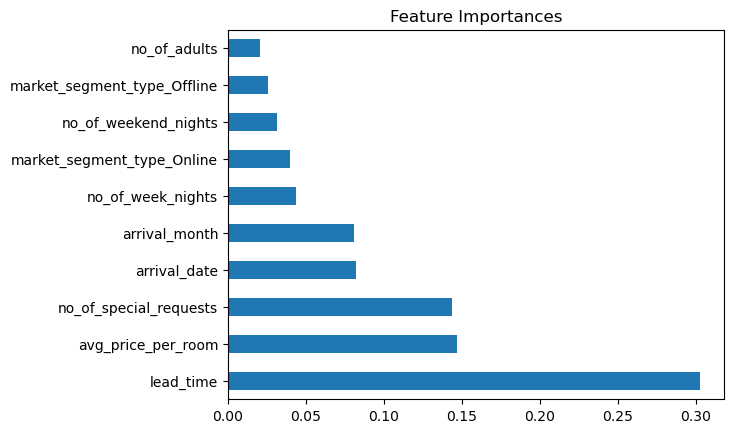

In [93]:
# Plot feature importances for the random forest classifier
feat_importances = pd.Series(rf_clf.feature_importances_, index=data_encoded.columns[:-1])
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

The above analysis For the Research Question 4 is answered with the above image. It dispalyed that Average_Price_per_room and Lead_time are  most important features.

# UNDERSAMPLING

In [94]:
# These will be used for Undersampling later.

train_data_us = train_data
test_data_us = test_data
val_data_us = val_data
val_target_us = val_target
train_target_us = train_target
test_target_us = test_target

#unseen_data_us = unseen_data

In [95]:
# variable copies for undersampling
under_train_data = train_data_us
under_train_target = train_target_us
under_val_data = val_data_us
under_val_target = val_target_us
under_test_data = test_data_us
under_test_target = test_target_us

In [96]:
import random #The random module is used to generate random numbers.
from imblearn.under_sampling import RandomUnderSampler #The RandomUnderSampler class is a class that implements random undersampling

def undersample(train_data, train_target):# line of code defines the undersample() function
    rus = RandomUnderSampler(random_state=0) #line of code creates an instance of the RandomUnderSampler class.
    #The random_state parameter is set to 0 to ensure that the results are reproducible.
    train_data_resampled, train_target_resampled = rus.fit_resample(train_data, train_target)
    # calls the fit_resample() method on the RandomUnderSampler instance.
    # The fit_resample() method undersamples the train_data and train_target datasets.

    return train_data_resampled, train_target_resampled

train_data_usampled, train_target_usampled = undersample(under_train_data, under_train_target)
#calls the undersample() function on the under_train_data and under_train_target datasets.

print(train_data_usampled.shape)
print(train_target_usampled.shape)

(20082, 26)
(20082,)


In [97]:
print("train_data_usampled.shape: ",train_data_usampled.shape)
print("train_target_usampled.shape: ",train_target_usampled.shape)
print("under_val_data: ",under_val_data.shape)
print("under_val_target: ",under_val_target.shape)
print("under_test_data: ",under_test_data.shape)
print("under_test_target: ",under_test_target.shape)

train_data_usampled.shape:  (20082, 26)
train_target_usampled.shape:  (20082,)
under_val_data:  (4353, 26)
under_val_target:  (4353,)
under_test_data:  (1089, 26)
under_test_target:  (1089,)


In [98]:
train_target_usampled.value_counts()

Canceled        10041
Not_Canceled    10041
Name: booking_status, dtype: int64

### Standardization of Undersampled Data

In [99]:
scaler = StandardScaler()
train_data_usampled_scaled = scaler.fit_transform(train_data_usampled)
val_data_scaled = scaler.transform(under_val_data)
test_data_scaled = scaler.transform(under_test_data)

### Logistic Regression on Undersampled Data

In [100]:
# Logistic Regression
logistic_regression = LogisticRegression()

# Train the Logistic Regression classifier
logistic_regression.fit(train_data_usampled_scaled, train_target_usampled)

# Make predictions on the train and test data
logistic_regression_train_pred = logistic_regression.predict(train_data_usampled_scaled)
logistic_regression_val_pred = logistic_regression.predict(val_data_scaled)

# Print performance metrics for Logistic Regression
print('Logistic Regression Classifier:')
print('Train Accuracy:', accuracy_score(train_target_usampled, logistic_regression_train_pred))
print('Test Accuracy:', accuracy_score(under_val_target, logistic_regression_val_pred))
print('Confusion Matrix:\n', confusion_matrix(under_val_target, logistic_regression_val_pred))


Logistic Regression Classifier:
Train Accuracy: 0.7779105666766258
Test Accuracy: 0.7792327130714449
Confusion Matrix:
 [[1107  357]
 [ 604 2285]]


In [101]:
rf_report_us = classification_report(under_val_target, logistic_regression_val_pred)
print(rf_report_us)

              precision    recall  f1-score   support

    Canceled       0.65      0.76      0.70      1464
Not_Canceled       0.86      0.79      0.83      2889

    accuracy                           0.78      4353
   macro avg       0.76      0.77      0.76      4353
weighted avg       0.79      0.78      0.78      4353



In [102]:
# Use the trained model to make predictions on the unseen data
unseen_pred = logistic_regression.predict(test_data_scaled)
print('Unseen Test Data Accuracy:', accuracy_score(under_test_target, unseen_pred))

Unseen Test Data Accuracy: 0.7823691460055097


### KNN on Undersampled Data

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11 ],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(train_data_usampled_scaled, train_target_usampled)
beu_params = grid_search.best_params_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'algorithm': 'brute', 'n_neighbors': 11, 'weights': 'distance'}


In [121]:

# Create KNN classifier with best parameters
knn_clf = KNeighborsClassifier(**best_params)

# Train the KNN classifier
knn_clf.fit(train_data_usampled_scaled, train_target_usampled)

# Make predictions on the train and test data
train_pred = knn_clf.predict(train_data_usampled_scaled)
val_pred = knn_clf.predict(val_data_scaled)

# Print performance metrics
print('K-Nearest Neighbors Classifier:')
print('Train Accuracy:', accuracy_score(train_target_usampled, train_pred))
print('Validation Accuracy:', accuracy_score(under_val_target, val_pred))
print('Confusion Matrix:\n', confusion_matrix(under_val_target, val_pred))


K-Nearest Neighbors Classifier:
Train Accuracy: 0.9926302161139329
Validation Accuracy: 0.8458534344130485
Confusion Matrix:
 [[1259  205]
 [ 466 2423]]


In [105]:
knn_report_us = classification_report(under_val_target, val_pred)
print(knn_report_us)

              precision    recall  f1-score   support

    Canceled       0.73      0.86      0.79      1464
Not_Canceled       0.92      0.84      0.88      2889

    accuracy                           0.85      4353
   macro avg       0.83      0.85      0.83      4353
weighted avg       0.86      0.85      0.85      4353



In [106]:
# Use the trained model to make predictions on the unseen data
unseen_pred = knn_clf.predict(test_data_scaled)
print('Unseen Test Data Accuracy:', accuracy_score(under_test_target, unseen_pred))

Unseen Test Data Accuracy: 0.8438934802571166


### Decision Tree CLassifier on Undersampled Data

In [107]:
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
dt_clf = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt_clf, dt_params, cv=5, n_jobs=-1, verbose=1)
dt_grid_search.fit(train_data_usampled_scaled, train_target_usampled)
dt_best_params = dt_grid_search.best_params_
print(dt_best_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [108]:
# Train decision tree classifier with best parameters and measure performance
dt_clf = DecisionTreeClassifier(**dt_best_params, random_state=42)
dt_clf.fit(train_data_usampled_scaled, train_target_usampled)
train_pred = dt_clf.predict(train_data_usampled_scaled)
val_pred = dt_clf.predict(val_data_scaled)
print('Decision Tree Classifier:')
print('Train Accuracy:', accuracy_score(train_target_usampled, train_pred))
print('Validation Accuracy:', accuracy_score(under_val_target, val_pred))
print('Confusion Matrix:\n', confusion_matrix(under_val_target, val_pred))

Decision Tree Classifier:
Train Accuracy: 0.9146001394283438
Test Accuracy: 0.853893866299104
Confusion Matrix:
 [[1275  189]
 [ 447 2442]]


In [109]:
rf_report_us = classification_report(under_val_target, val_pred)
print(rf_report_us)

              precision    recall  f1-score   support

    Canceled       0.74      0.87      0.80      1464
Not_Canceled       0.93      0.85      0.88      2889

    accuracy                           0.85      4353
   macro avg       0.83      0.86      0.84      4353
weighted avg       0.87      0.85      0.86      4353



In [110]:
# Use the trained model to make predictions on the unseen data
unseen_pred = dt_clf.predict(test_data_scaled)
print('Unseen Test Data Accuracy:', accuracy_score(under_test_target, unseen_pred))

Unseen Test Data Accuracy: 0.852157943067034


### Random Forest Classifier on Undersampled Data

In [112]:
rf_params = {
    'n_estimators': [100, 300, 500],
    #n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
    #Higher number of trees give you better performance but makes your code slower.
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
rf_clf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_clf, rf_params, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(train_data_usampled_scaled, train_target_usampled)
rf_best_params = rf_grid_search.best_params_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [113]:
# Train random forest classifier with best parameters and measure performance
rf_clf = RandomForestClassifier(**rf_best_params, random_state=42)
rf_clf.fit(train_data_usampled_scaled, train_target_usampled)
train_pred = rf_clf.predict(train_data_usampled_scaled)
val_pred = rf_clf.predict(val_data_scaled)
print('Random Forest Classifier:')
print('Train Accuracy:', accuracy_score(train_target_usampled, train_pred))
print('Validation Accuracy:', accuracy_score(under_val_target, val_pred))
print('Confusion Matrix:\n', confusion_matrix(under_val_target, val_pred))

Random Forest Classifier:
Train Accuracy: 0.9792351359426352
Test Accuracy: 0.8934068458534344
Confusion Matrix:
 [[1286  178]
 [ 286 2603]]


In [114]:
rf_report_us = classification_report(under_val_target, val_pred)
print(rf_report_us)

              precision    recall  f1-score   support

    Canceled       0.82      0.88      0.85      1464
Not_Canceled       0.94      0.90      0.92      2889

    accuracy                           0.89      4353
   macro avg       0.88      0.89      0.88      4353
weighted avg       0.90      0.89      0.89      4353



In [115]:
# Use the trained model to make predictions on the unseen data
unseen_pred = rf_clf.predict(test_data_scaled)
print('Unseen Test Data Accuracy:', accuracy_score(under_test_target, unseen_pred))

Unseen Test Data Accuracy: 0.8925619834710744


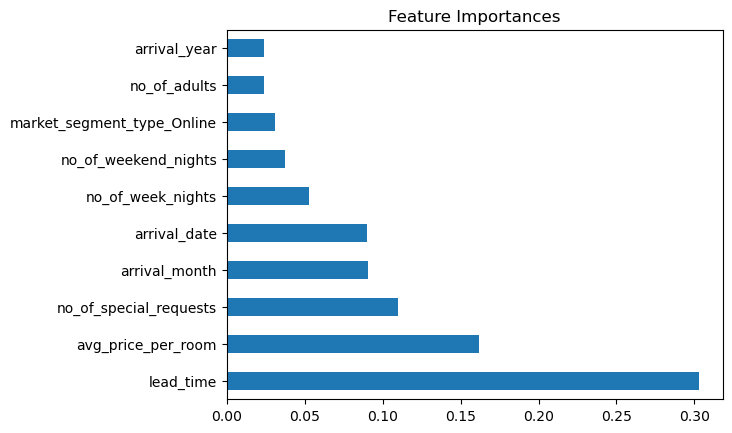

In [116]:
# Plot feature importances for the random forest classifier
feat_importances = pd.Series(rf_clf.feature_importances_, index=data_encoded.columns[:-1])
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [117]:
undersampled_results = {'Logistic Regression': {'Training Accuracy (UnderSampled)': 77.79, 'Validation Accuracy (UnderSampled)': 77.92, 'Testing Accuracy (UnderSampled)': 78.23},
            'K-Nearest Neighbours': {'Training Accuracy (UnderSampled)': 99.26, 'Validation Accuracy (UnderSampled)':84.58 ,'Testing Accuracy (UnderSampled)': 84.38},
            'Decision Tree': {'Training Accuracy (UnderSampled)': 91.46,'Validation Accuracy (UnderSampled)':85.38 , 'Testing Accuracy (UnderSampled)': 85.21},
            'Random Forest': {'Training Accuracy (UnderSampled)': 97.92 ,'Validation Accuracy (UnderSampled)':89.34 , 'Testing Accuracy (UnderSampled)': 89.25}}

US_Data_Results = pd.DataFrame(undersampled_results).transpose()
US_Data_Results

,Training Accuracy (UnderSampled),Validation Accuracy (UnderSampled),Testing Accuracy (UnderSampled)
Logistic Regression,77.79,77.92,78.23
K-Nearest Neighbours,99.26,84.58,84.38
Decision Tree,91.46,85.38,85.21
Random Forest,97.92,89.34,89.25


In [120]:
oversampled_results = {'Logistic Regression': {'Training Accuracy (OverSampled)': 79.30,'Validation Accuracy (OverSampled)': 78.15, 'Testing Accuracy (OverSampled)':77.68},
            'K-Nearest Neighbours': {'Training Accuracy (OverSampled)': 99.38,'Validation Accuracy (OverSampled)': 86.72, 'Testing Accuracy (OverSampled)': 87.87},
            'Decision Tree': {'Training Accuracy (OverSampled)': 99.46,'Validation Accuracy (OverSampled)': 87.08, 'Testing Accuracy (OverSampled)': 88.33},
            'Random Forest': {'Training Accuracy (OverSampled)': 99.46 ,'Validation Accuracy (OverSampled)': 90.55, 'Testing Accuracy (OverSampled)': 89.99}}

OS_Data_Results = pd.DataFrame(oversampled_results).transpose()
OS_Data_Results

,Training Accuracy (OverSampled),Validation Accuracy (OverSampled),Testing Accuracy (OverSampled)
Logistic Regression,79.30,78.15,77.68
K-Nearest Neighbours,99.38,86.72,87.87
Decision Tree,99.46,87.08,88.33
Random Forest,99.46,90.55,89.99


On comparing the performances of various machine learning algorithms on oversampled and undersampled data, it is observed that Random Forest has perfromed the best in the cases. But Random Forest on Oversampled data has given the training accuracy of 99.46% and Validation accuracy of  90.46% and Testing Accuracy is 89.80%.

## Performance Metrics

A confusion matrix is a table that is used to summarize the performance of a classification model. The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives.

Here is an example of a confusion matrix:<br>

<img src="images/confusion_matrix.jpg" />

The confusion matrix is divided into four quadrants:

True positives (TP): These are the instances that were correctly classified as positive.

False positives (FP): These are the instances that were incorrectly classified as positive.

True negatives (TN): These are the instances that were correctly classified as negative.

False negatives (FN): These are the instances that were incorrectly classified as negative.

The confusion matrix can be used to evaluate the performance of a classification model. The model can be improved by reducing the number of false positives and false negatives.

Here are some of the metrics that can be calculated from the confusion matrix:

**Accuracy:** Accuracy is the fraction of all instances that were correctly classified.

Precision: Precision is the fraction of positive instances that were correctly classified.

Recall: Recall is the fraction of all positive instances that were correctly classified.

F1 score: The F1 score is a weighted average of precision and recall.

1) https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62<br><br>

2) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html<br><br>

3) https://ieeexplore.ieee.org/document/9725404<br><br>




# THE END